In [1]:
import numpy as np
import pandas as pd 
import os

# Sobre a base de dados

A base de dados do videogame Pokémom da Nitendo, originalmente lançado em 1996 concentra-se nas estatísticas e recursos do Pokémon nos RPGs. Até 2017, foram publicadas sete gerações de Pokémon.

Este banco de dados inclui 21 variáveis para cada um dos 721 Pokémon das primeiras seis gerações, mais a ID do Pokémon e seu nome. Essas variáveis são brevemente descritas a seguir:

- Número. ID do Pokémon no Pokédex.
- Nome. Nome do Pokémon.
- Tipo 1. Tipo primário.
- Tipo 2. Segundo tipo, caso o Pokémon o tenha.
- Total. Soma de todas as estatísticas básicas (pontos de saúde, ataque, defesa, ataque especial, defesa especial e velocidade).
- HP. Pontos de saúde básicos.
- Ataque. Ataque básico.
- Defesa. Defesa de base.
- Sp_Atk. Ataque especial básico.
- Sp_Def. Defesa especial da base.
- Velocidade. Velocidade base.
- Geração. Número da geração quando o Pokémon foi introduzido.
- isLegendary. Booleano que indica se o Pokémon é Lendário ou não.
- Cor. Cor do Pokémon de acordo com o Pokédex.
- hasGender. Booleano que indica se o Pokémon pode ser classificado como feminino ou masculino.
- Pr_male. Caso o Pokémon tenha Sexo, a probabilidade de ser do sexo masculino. A probabilidade de ser mulher é, obviamente, 1 menos esse valor.
- Grupo de Ovos 1. Grupo de Ovos do Pokémon.
- Grupo de Ovos 2. Segundo Grupo de Ovos do Pokémon, caso ele tenha dois.
- hasMegaEvolution. Booleano que indica se o Pokémon é capaz de Megaevoluir ou não.
- Height_m. Altura do Pokémon, em metros.
- Peso_kg. Peso do Pokémon, em quilogramas.
- Catch_Rate. Taxa de captura.
- Body_Style. Estilo corporal do Pokémon de acordo com o Pokédex.

In [2]:
df = pd.read_csv("/kaggle/input/pokemon/pokemon_alopez247.csv")
df.shape

(721, 23)

In [3]:
df.head().T

,0,1,2,3,4
Number,1,2,3,4,5
Name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
Type_1,Grass,Grass,Grass,Fire,Fire
Type_2,Poison,Poison,Poison,NaN,NaN
Total,318,405,525,309,405
HP,45,60,80,39,58
Attack,49,62,82,52,64
Defense,49,63,83,43,58
Sp_Atk,65,80,100,60,80
Sp_Def,65,80,100,50,65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

A base de dados apresenta 721 observações e 23 colunas. Dentre essas colunas, a coluna Type_1 foi escolhida como variável dependente do modelo, portanto será a variável prevista. Será utilizada as demais variáveis como variáveis independentes, que tentaram explicar a variável $y$ do modelo, com a exceção da variável Type_2, que ...

# Preparação dos dados

In [5]:
df['Type_1'].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Dark         28
Poison       28
Fighting     25
Dragon       24
Ice          23
Ghost        23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

A variável Type_1 explica o tipo primário de Pokemon. Com 18 tipos primários diferentes de Pokemons, o tipo mais frequente no banco de dados é o tipo primário 'water', com 105 Pokemons das primeiras gerações e o tipo menos frequente foi o tipo 'flying' com 3 Pokemons.

In [6]:
df['Type_2'].value_counts()

Flying      87
Poison      31
Ground      30
Psychic     27
Fighting    19
Steel       19
Fairy       18
Grass       18
Dark        16
Dragon      14
Rock        14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

In [7]:
df['Type_2'] = df['Type_2'].fillna('Nao Informado')
df['Pr_Male'] = df['Pr_Male'].fillna(0)

In [8]:
df = pd.get_dummies(df, columns=['Name', 'Type_2', 'Color',
'Egg_Group_1','Body_Style','isLegendary','hasGender','hasMegaEvolution'], drop_first=True)

df.head().T

,0,1,2,3,4
Number,1,2,3,4,5
Type_1,Grass,Grass,Grass,Fire,Fire
Total,318,405,525,309,405
HP,45,60,80,39,58
Attack,49,62,82,52,64
...,...,...,...,...,...
Body_Style_two_wings,0,0,0,0,0
Body_Style_with_fins,0,0,0,0,0
isLegendary_True,0,0,0,0,0
hasGender_True,1,1,1,1,1


In [9]:
# Separando dados de treino e teste

# Importando o train_test_split
from sklearn.model_selection import train_test_split

# Dividindo em treino e teste
train, test = train_test_split(df, test_size=0.2, random_state=42)

train.shape, test.shape

((576, 792), (145, 792))

In [10]:
feats = [c for c in train.columns if c not in ['Type_1','Egg_Group_2']]

# Modelo

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

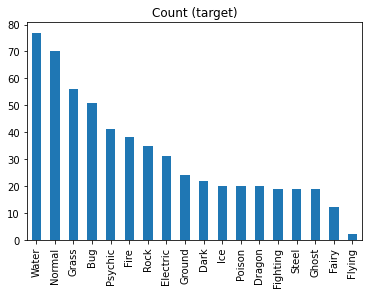

In [12]:
target_count = train.Type_1.value_counts()

target_count.plot(kind='bar', title='Count (target)');

Com o auxílio do gráfico acima é possível identificar que os tipos primários de Pokemons apresentam um grande desbalanceamento, pois existem valores que são mais frequentes e outros que quase não aparecem, como por exemplo o tipo 'flying' que aparece na base de dados somente 3 vezes. Sendo assim, esses valores menos frequente poderão não aparecer na base de treino ou na base de testes.

Isso afetaria negativamente a classificação, pois o modelo irá classificar muito bem os valores que são encontrados com frequência na base de dados e classificará de forma ruim os valores que não são frequentes ou não consiguirá classificá-los. 


In [13]:
rf.fit(train[feats], train['Type_1'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
from sklearn.metrics import accuracy_score

# Previsões na base de teste
preds_test = rf.predict(test[feats])

# Medir a acurácia
accuracy_score(test['Type_1'], preds_test)

0.5862068965517241

O modelo consegue explicar 58% dos dados

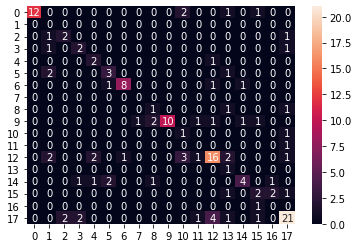

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(preds_test, test['Type_1'])
sns.heatmap(cm, annot=True);

# Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

A subamostragem consiste em coletar amostras das classes majoritárias a fim de balanceá-las com as classes minoritárias

In [16]:
from imblearn.under_sampling import TomekLinks

Using TensorFlow backend.


In [17]:
tl = TomekLinks()
X_under, y_under = tl.fit_sample(df[feats], df['Type_1'])

In [18]:
X_under.shape, y_under.shape

((446, 790), (446,))

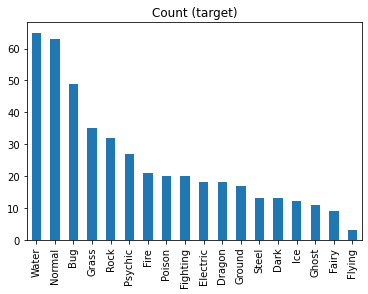

In [19]:
target_count = y_under.value_counts()

target_count.plot(kind='bar', title='Count (target)');

In [20]:
# Dividindo em treino e teste
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

# Treinar o modelo
rf.fit(X_treinamento_u, y_treinamento_u)

# Previsões na base de teste
preds_test = rf.predict(X_teste_u)

# Medir a acurácia
accuracy_score(y_teste_u, preds_test)

0.6333333333333333

O modelo de undersampling explicou 62% dos dados, portanto houve uma melhora em relação ao primeiro modelo

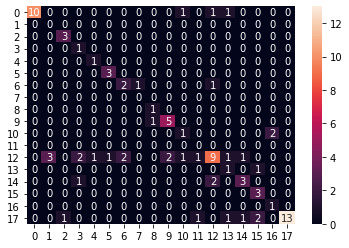

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(preds_test, y_teste_u)
sns.heatmap(cm, annot=True);

# Sobreamostragem (oversampling) - SMOTE

A sobreamostragem consiste em adicionar exemplos na classe minoritária para balanceá-las com a classe mojoritária. Essa técnica pode replicar dados da classe minoritária ou gerar dados artificiais. 

In [22]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

In [23]:
X, y = df[feats], df['Type_1']

In [24]:
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)

In [25]:
X_over.shape,y_over.shape

((1890, 790), (1890,))

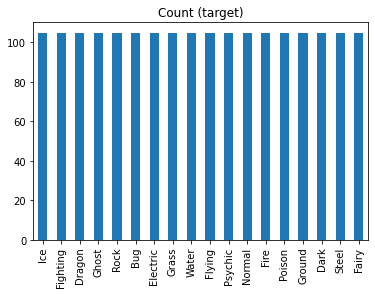

In [26]:
target_count = y_over.value_counts()

target_count.plot(kind='bar', title='Count (target)');

In [27]:
# Dividindo em treino e teste
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over,
                                                                          y_over,
                                                                          test_size=0.2,
                                                                          stratify=y_over)
X_treinamento_o.shape, X_teste_o.shape

((1512, 790), (378, 790))

In [28]:
rf.fit(X_treinamento_o, y_treinamento_o)

# Previsões na base de teste
preds_test = rf.predict(X_teste_o)

# Medir a acurácia
accuracy_score(y_teste_o, preds_test)

0.9338624338624338

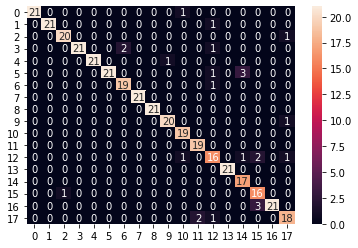

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(preds_test, y_teste_o)
sns.heatmap(cm, annot=True);